In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('transfers.csv')

## Find Top 5 Leagues by turnover in selling players

In [29]:
league_from = data.groupby(['League_from'])['Transfer_fee'].sum()
top5sell_league = league_from.sort_values(ascending=False).head(5)
top5sell_league = top5sell_league/1000000
top5sell_league.head()

League_from
Premier League    7248.51
Serie A           7083.98
LaLiga            5533.86
Ligue 1           4396.89
1.Bundesliga      3062.96
Name: Transfer_fee, dtype: float64

## Find Top 5 Leagues by turnover in buying players

In [30]:
league_to = data.groupby(['League_to'])['Transfer_fee'].sum()
top5buy_league = league_to.sort_values(ascending=False).head(5)
top5buy_league = top5buy_league/1000000
top5buy_league.head()

League_to
Premier League    14695.400
Serie A            7535.220
LaLiga             6680.360
Ligue 1            3682.720
1.Bundesliga       3599.645
Name: Transfer_fee, dtype: float64

## Profits?

In [31]:
diff_league = top5sell_league - top5buy_league
diff_league = diff_league.sort_values(ascending=False)
diff_league.head()

League_from
Ligue 1            714.170
Serie A           -451.240
1.Bundesliga      -536.685
LaLiga           -1146.500
Premier League   -7446.890
Name: Transfer_fee, dtype: float64

It is not a new information that EPL has the biggest amount of money involved and that clubs can permit themselves to buy a lot as they gain money from other sources. What is really interesting is that clubs from French League1 in general make money on transfers. I actually thought that all of the numbers will be with the minus sign. 

## Summary

In [9]:
league_summary = pd.concat([top5sell_league, top5buy_league], axis=1)
league_summary = league_summary.assign(diff=diff_league)
new_columns = league_summary.columns.values
new_columns[[0, 1]] = ['sell', 'buy']
league_summary.columns = new_columns
league_summary.head()

,sell,buy,diff
Premier League,7248510000,14695400000,-7446890000
Serie A,7083980000,7535220000,-451240000
LaLiga,5533860000,6680360000,-1146500000
Ligue 1,4396890000,3682720000,714170000
1.Bundesliga,3062960000,3599645000,-536685000


## Analyzing clubs
## Sellers

In [10]:
club_from_sum = data.groupby(['Team_from'])['Transfer_fee'].sum()
club_from_count = data.groupby(['Team_from'])['Transfer_fee'].count()
club_from_mean_price = (club_from_sum/1000000) / club_from_count

## Buyers

In [11]:
club_to_sum = data.groupby(['Team_to'])['Transfer_fee'].sum()
club_to_count = data.groupby(['Team_to'])['Transfer_fee'].count()
club_to_mean_price = (club_to_sum/1000000) / club_to_count

## Profits?

In [12]:
diff_club = club_from_sum - club_to_sum
diff_club = diff_club.sort_values(ascending=False)
diff_club = diff_club.dropna()

## Summary Top and Bottom 15 for clubs
## Total sum of sales

In [27]:
club_from_sum = club_from_sum.sort_values(ascending=False)
club_from_sum = club_from_sum/1000000
club_from_sum.head(15)

Team_from
Monaco             948.17
FC Porto           917.55
Real Madrid        891.40
Chelsea            839.53
Liverpool          798.41
Juventus           797.98
Benfica            785.75
Inter              785.28
FC Barcelona       752.10
Atlético Madrid    734.40
AS Roma            724.80
Spurs              699.00
Valencia CF        599.65
Bor. Dortmund      580.35
Sevilla FC         564.60
Name: Transfer_fee, dtype: float64

In [28]:
club_from_sum.tail(15)

Team_from
Viking FK          1.300
Hammarby           1.300
FCM Bacau          1.300
SH Shenhua         1.300
Rotherham Utd.     1.200
Energie Cottbus    1.200
Coimbra            1.200
Figueirense FC     1.200
UCLA Bruins        1.000
CDUC               1.000
Belenenses         1.000
Lada Togliatti     1.000
Istres FC          1.000
Anconitana         0.950
Lausanne-Sport     0.825
Name: Transfer_fee, dtype: float64

## Mean price of a sale

In [16]:
club_from_mean_price = club_from_mean_price.sort_values(ascending=False)
club_from_mean_price.head(15)
# in millions

Team_from
Athletic Bilbao    31.800000
RB Leipzig         23.300000
Monaco             20.173830
FC Augsburg        20.000000
FC Barcelona       19.792105
SSC Napoli         19.480556
Shakhtar D.        18.360000
Southampton        18.215200
GZ Evergrande      17.725000
AS Roma            16.855814
Real Madrid        16.818868
Bor. Dortmund      16.581429
Real Sociedad      16.563636
Lazio              16.419286
FC Porto           16.384821
Name: Transfer_fee, dtype: float64

In [17]:
club_from_mean_price.tail(15)
# I should've put some minimum borderline of let's say 10 men moved

Team_from
FCM Bacau          1.300
Viking FK          1.300
Hammarby           1.300
Rotherham Utd.     1.200
Figueirense FC     1.200
Energie Cottbus    1.200
Coimbra            1.200
Boavista           1.100
Istres FC          1.000
Lada Togliatti     1.000
UCLA Bruins        1.000
CDUC               1.000
Belenenses         1.000
Anconitana         0.950
Lausanne-Sport     0.825
Name: Transfer_fee, dtype: float64

## Total sum of buys

In [26]:
club_to_sum = club_to_sum.sort_values(ascending=False)
club_to_sum = club_to_sum/1000000
club_to_sum.head(15)

Team_to
Chelsea            1820.65
Man City           1800.52
Real Madrid        1680.65
FC Barcelona       1673.04
Man Utd            1497.36
Juventus           1470.94
Liverpool          1412.42
Paris SG           1274.78
Inter              1202.69
Spurs              1024.40
AC Milan            941.35
Atlético Madrid     918.81
Arsenal             899.06
AS Roma             826.38
Bayern Munich       812.35
Name: Transfer_fee, dtype: float64

In [19]:
club_to_sum.tail(15)

Team_to
Helsingborg        1500000
Man Utd U18        1500000
Hajduk Split       1500000
Malmö FF           1330000
FCS Bucharest      1300000
Pohang Steelers    1300000
Querétaro FC       1200000
Slavia Prag        1100000
Boavista           1000000
Dinamo Zagreb      1000000
Royal Antwerp      1000000
Chelsea U23        1000000
Al-Ittihad         1000000
M. Tel Aviv        1000000
Ascoli              900000
Name: Transfer_fee, dtype: int64

## Mean price of a buy

In [20]:
club_to_mean_price = club_to_mean_price.sort_values(ascending=False)
club_to_mean_price.head(15)

Team_to
SIPG              25.983333
FC Barcelona      23.900571
CC Yatai          23.300000
Man Utd           23.036308
Real Madrid       22.408667
Paris SG          19.314848
Man City          19.154468
Chelsea           18.965104
Juventus          16.907356
Liverpool         16.616706
Bayern Munich     15.043519
TJ Quanjian       14.992500
JS Suning         14.783750
Arsenal           14.738689
AC Milan          13.843382
Name: Transfer_fee, dtype: float64

In [21]:
club_to_mean_price.tail(15)

Team_to
Helsingborg        1.50000
1860 Munich        1.39375
Malmö FF           1.33000
FCS Bucharest      1.30000
Pohang Steelers    1.30000
Iraklis            1.25000
Querétaro FC       1.20000
Slavia Prag        1.10000
Royal Antwerp      1.00000
Dinamo Zagreb      1.00000
Chelsea U23        1.00000
M. Tel Aviv        1.00000
Boavista           1.00000
Al-Ittihad         1.00000
Ascoli             0.90000
Name: Transfer_fee, dtype: float64

## Profits / Loses

In [25]:
diff_club.head(15)
# in millions

FC Porto          556.74
Benfica           451.05
Udinese Calcio    342.50
River Plate       324.63
Parma             263.79
Monaco            262.56
AFC Ajax          245.33
Santos FC         245.00
LOSC Lille        220.44
Sporting CP       209.25
Internacional     205.26
Dinamo Zagreb     201.43
São Paulo         201.31
Cruzeiro          181.00
Boca Juniors      175.60
Name: Transfer_fee, dtype: float64

In [24]:
diff_club = diff_club/1000000
diff_club.tail(15)
# in millions

Everton           -233.43
SSC Napoli        -251.80
Spurs             -325.40
Arsenal           -368.89
Inter             -417.41
AC Milan          -452.00
Bayern Munich     -508.95
Liverpool         -614.01
Juventus          -672.96
Real Madrid       -789.25
Paris SG          -880.15
FC Barcelona      -920.94
Man Utd           -969.79
Chelsea           -981.12
Man City         -1381.27
Name: Transfer_fee, dtype: float64

## Visualize

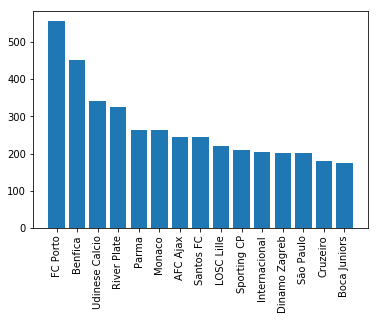

In [35]:
visual = diff_club.head(15)
millions = np.array(visual.values).tolist()
teams = np.array(visual.index.values).tolist()
ind = np.arange(len(teams))
plt.bar(ind, millions)
plt.xticks(ind, teams, rotation=90)
plt.show()

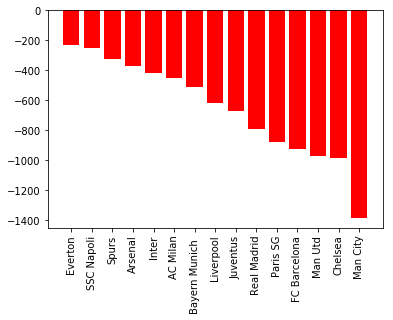

In [37]:
visual_loses = diff_club.tail(15)
millions = np.array(visual_loses.values).tolist()
teams = np.array(visual_loses.index.values).tolist()
ind = np.arange(len(teams))
plt.bar(ind, millions, color = 'r')
plt.xticks(ind, teams, rotation=90)
plt.show()

This is a basic analysis, but it already answers few interesting questions.
1. The richest league - English Premier League (obvious)
2. Clubs of which Top-5 league make money on transfer market? - Ligue1
3. The biggest sellers in the market, top5: Monaco, FC Porto, Real Madrid, Chelsea, Liverpool
4. The biggest buyers in the market, top5: Chelsea, Man City, Real Madrid, FC Barcelona, Man Utd
5. Clubs that sell expensive players on average: Athletic Bilbao, RB Leipzig, Monaco, FC Augsburg, FC Barcelona
6. Clubs that buy expensive players on average: SIPG, FC Barcelona, CC Yatai, Man Utd, Real Madrid
7. Clubs that made money during last 18 years on the transfer market: FC Porto, Benfica, Udinese Calcio, River Plate, Parma
8. Clubs that lost money (a lot of money actually): Man City, Chelsea, Man Utd, FC Barcelona, Paris SG

I've being looking at this summary for 10 minutes or so trying to make some smart conclusions and what did I understand? Nothing interesting here, all the answers are logical if you know at least something about football. Big clubs with a lot of money buy best players and trying to win all the possible tropheys. Clubs out of top 5 leagues just trying to make money and portugeses do that the best. Also it is not that much about the money, but about the level of the league - best players go to better leagues and this is clear and completely logical.
Although, I think I could find more interesting stuff in dynamics, by analyzing the market divided by periods. For example, we can see that English clubs spent a lot of money on transfers since 2000, but last 10 years Spanish clubs totally dominate Europe. Does it correlate with increased expenses on transfers? I will find that out next weekeneds.